#### 파이프라인?
```
데이터 전처리, 특성 추출, 모델학습을 하나의 흐름으로 연결
```
#### 사용이유
```
코드 간결화 : 여러단계를 하나로 묶어 관리
재현성 보장 : 전체 프로세스를 일관되게 실행
데이터 누수 방지 : 교차 검증시 각 fold에서 독립적으로 전처리
하이퍼 파라메터 뉴팅 용이 : 전체 파이프라인에 대해서 그리드서치 적용
```
##### 파이프라인 구성요소
```
변환기
    데이터를 변환하는 객체
    fit() : 데이터에서 파라메터를 학습
    transform() : 학습파라메터로 데이터를 변환
    StandardScaler, PCA, MinMaxScaler ...
추정기
    머신러닝 모델
    fit() : 데이터로 모델을 학습
    predict() : 예측 수행
    RandomForest, SVM ...
```
#### 데이터 : 위스콘시 유방암 데이터  대표적인 이진분류 데이터
```
클래스 2(양성 악성)
특성 :  10개
| 그룹 | Feature 이름          | 의미                                |
| -- | ------------------- | --------------------------------- |
| 1  | `radius`            | 세포 핵의 반지름 평균 (centroid와 경계 사이 거리) |
| 2  | `texture`           | 회색조 값의 표준편차 (질감)                  |
| 3  | `perimeter`         | 세포 핵의 둘레 길이                       |
| 4  | `area`              | 세포 핵의 면적                          |
| 5  | `smoothness`        | 반지름의 국소적 변화 (핵 경계의 매끄러움)          |
| 6  | `compactness`       | 둘레² / 면적 - 1.0 (핵의 조밀도)           |
| 7  | `concavity`         | 오목한 부분의 심도 (함몰 정도)                |
| 8  | `concave points`    | 오목한 부분의 개수                        |
| 9  | `symmetry`          | 대칭성                               |
| 10 | `fractal_dimension` | 경계의 복잡도 (프랙탈 차원 근사값)              |

```


In [ ]:
# 파이프 라인 구성
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression  # 각클래스에 대한 확률값을 출력 이후 이 확률값이 큰 클래스가 선택 결국 분류모델
pipe = Pipeline([
    ('scaler',StandardScaler() ),
    ('pca', PCA(n_components=2) ),
    ('claaifier', LogisticRegression())
])

#### 파이프라인 실행과정
```
pipe.fit(x_train, y_train)
StandardScaler x_train에 fit --> 평균과 표준편차 계산
x_train 을 표준화 x_scaled
PCA가 x_scaled fit - > 주성분 계산
x_scaled 변환  x_pca
LogisticRegression 이 x_pca fit
```

#### 데이터 누수 방지
```
잘못된 예
전체 데이터를 먼저 스케일링
x_scaled = scaler.fit_transform(x)
x_train, x_test = train_test_split(x_scaled)
model.fit(x_train, y_train)
```
문제--> 테스트 데이터 정보가 스케일에 사용
```
올바른 예
학습데이터만으로 스케일링
x_train, x_test = train_test_split(x)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)  # fit없이 transform만 !!!
model.fit(x_train_scaled, y_train)
```

#### 파이프라인 사용(best)
```
pipe.fit(x_train, y_train)  # 학습데이터만 fit
pipe.predict(x_test)  # 테스트 데이터는 transform만```

#### 교차검증... k-겹
```
홀드아웃 : 데이터를 학습세트 테스트 세트 한번만 분할
전체데이터 100%
    학습 70~80
    테스트 20 ~ 30
장점:
    빠르다
    대용량 데이터에 적합
단점:
    데이터 분할에 따라서 성능이 크게 달라질수 있음
    작은 데이터셋 불안
    일부 데이터만 학습에 사용
언제사용:
    데이터가 충분히 많을때(수만개 이상)
    빠르게 평가할때
```

```
k-겹 교차검증(k-fold Cross-Validation)
```
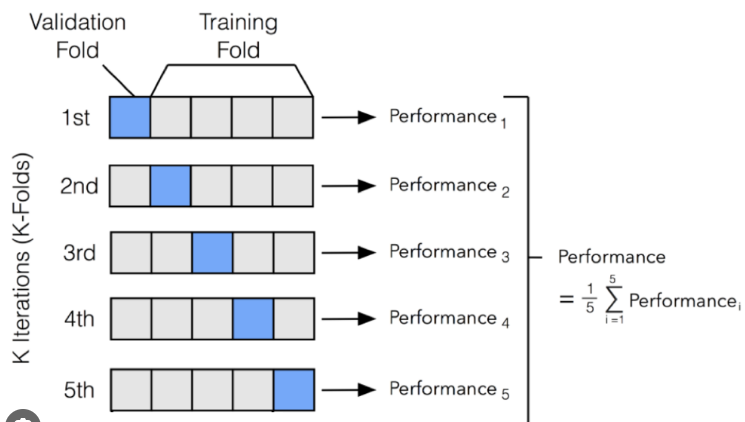

#### k-fold
```
일반 k-fold
층화 Stratified k-fod
```

#### 학습곡선과 검증 곡선
```
학습 데이터 크기에 따른 모델 성능을 시각화
```

#### 그리드 서치를 사용한 머신러닝 모델 세부 튜닝
```
하이퍼파라메터
    파라메터: 학습으로 찾음
        선형회귀 계수, 신경망의 가중치
        ...

    하이퍼 파라메터 : 사람이 설정
        학습률
        정규화
        트리의 깊이
        ...
그리드서치 : 모든 가능한 조합으로 체계적으로 시도
param_grid = {
    'max_depth' : [3,5,],
    ...
}

랜덤그리드서치 : 모든 가능한 조합을 랜덤
    더 넓은 영역을 탐색 -> 파라메터의 조합의 경우의 수
    시간제약이 있을때 
언제 사용
    그리드서치 : 하이퍼 파라메터 : 2~3
    랜덤서치 : 하이퍼 파라메터 : 4개이상
그리드 서치(각 3개 값)
A: 3개의 고유값
B: 3개의 고유값
랜덤서치(9번시도)
서로다른 최대 9개의 값으로 시도
중요한 파라메터에 더 많은 시도
```